<a href="https://colab.research.google.com/github/Taylor-X01/Optimization-Algorithms/blob/main_project/Line%20Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
from sympy import *
from sympy.abc import x,y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline


## Bissection Method

$$
Let\ f:\mathbb{R}\rightarrow\mathbb{R}\ and\ a<b \in\mathbb{R} : f'(a) \times f'(b)<0\\
  \  
$$

In [341]:
def bissection(fct,a,b,err):
  print("Function :",fct)
  fct_prime = fct.diff(x)

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  
  f_a = f_prime(a)
  f_b = f_prime(b)

  if f_a*f_b<0:
    print("Success")
    while (abs(b-a)>err) and (f_prime(a)*f_prime(b))<0:
      c = (a+b)/2
      # print(c)
      f_c = f_prime(c)
      if f_c <= 0 : a = c
      else: b = c
    print("2D: [x,f(x)] == ",[a,f(a)])
    return [a,f(a)]
  else: print("Failed")

def bissection_3d(fct,x1,y1,x2,y2,err):

  print("Function :",fct)
  fct_primeX = fct.diff(x)
  print("Derivée par rapport à x :\n",fct_primeX)
  fct_primeY = fct.diff(y)
  print("Derivée par rapport à Y :\n",fct_primeY)

  f = lambdify([x,y],fct)
  f_primeX = lambdify([x,y],fct_primeX)
  f_primeY = lambdify([x,y],fct_primeY)

  f_Xa = f_primeX(x1,y1)
  f_Xb = f_primeX(x2,y2)

  f_Ya = f_primeY(x1,y1)
  f_Yb = f_primeY(x2,y2)

  # print(f_prime(a))
  # print(f_prime(b))

  if f_Xa*f_Xb<0:
    print("Par rapport à x : Success")
    while (abs(x2-x1)>err) and (f_primeX(x1,y1)*f_primeX(x2,y2))<0:
      cx = (x1+x2)/2
      cy = (y1+y2)/2
      f_Xc = f_primeX(cx,cy)
      # print(f_c)
      if f_Xc <= 0 : x1 = cx
      else: x2 = cx
    
  else: print("Failed")

  if f_Ya*f_Yb<0:
      print("Par rapport à y : Success")
      while (abs(y2-y1)>err) and (f_primeY(x1,y1)*f_primeY(x2,y2))<0:
        cx = (x1+x2)/2
        cy = (y1+y2)/2
        f_Yc = f_primeY(cx,cy)
        if f_Yc <= 0 : y1 = cy
        else: y2 = cy
      print("3D: [(x,y),f(x,y)] == ",[(x1,y1),f(x2,y2)])
      return [(x1,y1),f(x2,y2)]

  else: print("Failed")





In [342]:
expr = ( (x+2*y-7)**2 )+( (2*x+y-5)**2 )
f = lambdify([x,y],expr)
expr_prime = expr.diff(x,y)
expr_prime

8

### Test functions :
$$
Booth\ Function :\ f_1 = (\ (x+2y-7)^2)+(2x+y-5)^2) \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \, (x,y)\in[-100,100]^2\\
f_2 = sin(2x) \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \  \, x\in[-2,0]
$$

Function : sin(2*x)
Success
2D: [x,f(x)] ==  [-0.796875, -0.9997365760093756]
Function : (x + 2*y - 7)**2 + (2*x + y - 5)**2
Derivée par rapport à x :
 10*x + 8*y - 34
Derivée par rapport à Y :
 8*x + 10*y - 38
Par rapport à x : Success
Par rapport à y : Success
3D: [(x,y),f(x,y)] ==  [(3.3935546875, 1.07421875), 10.418449878692627]


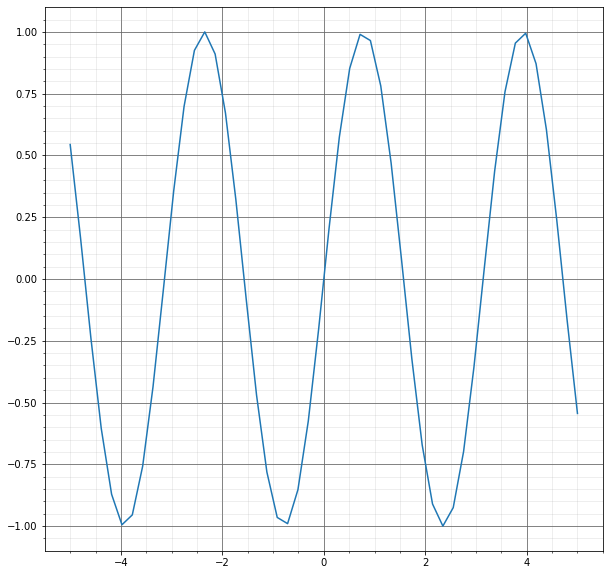

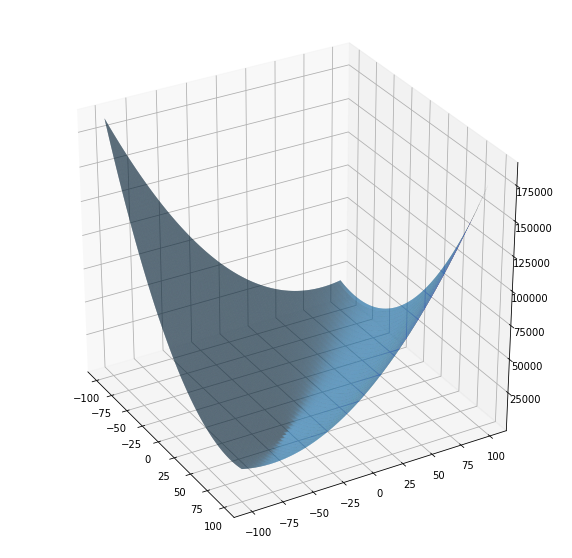

In [343]:
f1 = ( (x+2*y-7)**2 )+( (2*x+y-5)**2 )
f2 = sin(2*x)

lst1 = bissection(f2,-2,0,0.02)
lst2 = bissection_3d(f1,-100,-100,100,100,0.02)



f_lambda2 = lambdify(x,f2)
f_lambda1 = lambdify([x,y],f1)
# print(fx)
# fx(1,2)

fig1 = plt.figure(figsize=(10, 10))
x2 = np.linspace(-5, 5, 50)
ax1 = fig.gca()

# X2 = np.meshgrid(x2)
plt.plot(x2,f_lambda2(x2))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
# plt.show()

fig = plt.figure(figsize=(10, 10))
x1 = np.linspace(-100, 100, 5150)
y1 = np.linspace(-100, 100, 150)
X, Y = np.meshgrid(x1, y1)
Z = f_lambda1(X, Y)
ax = fig.gca(projection='3d')
ax.view_init(30, -30)
# sc = ax.plot_surface(x1,y1,x2,y2)
surf = ax.plot_surface(X, Y, Z,rstride=3, cstride=3)

plt.show()

## Secant Method

$$
Secant's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{ \left[ \frac{f(x_k)-f(x_{k-1})}{x_k - x_{k-1}}\right]}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{ \left[ \frac{f'(x_k)-f'(x_{k-1})}{f(x_k) - f(x_{k-1})}\right]}
$$

In [344]:
def secant(fct,x0,x_1,err=0.05):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  print(fct_prime)

  x_k = x_1
  x_k_1 = x0

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x_k)
  f_prime_xk_1 = f_prime(x_k_1) 

  while (abs(x_k - x_k_1) > err) and (f_prime_xk > err):
    x_k1 = x_k-(f_prime_xk/ ((f_prime_xk-f_prime_xk_1)/(f(x_k) - f(x_k_1))) )
    x_k_1 = x_k
    x_k = x_k1
    print("x_k: ",x_k)
    print("x_k-1: ",x_k_1)
    f_prime_xk = f_prime(x_k)
    f_prime_xk_1 = f_prime(x_k_1)
    print("f_prime_xk : ",f_prime_xk)
    print("f_prime_xk-1 : ",f_prime_xk_1) 


  if f_prime_xk < err:
    print([x_k,f(x_k)])
    return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")



Function : x**2 + 5*x
2*x + 5
2
x_k:  -2.5
f_prime_xk :  0.0
f_second_xk :  2
[-2.5, -6.25]


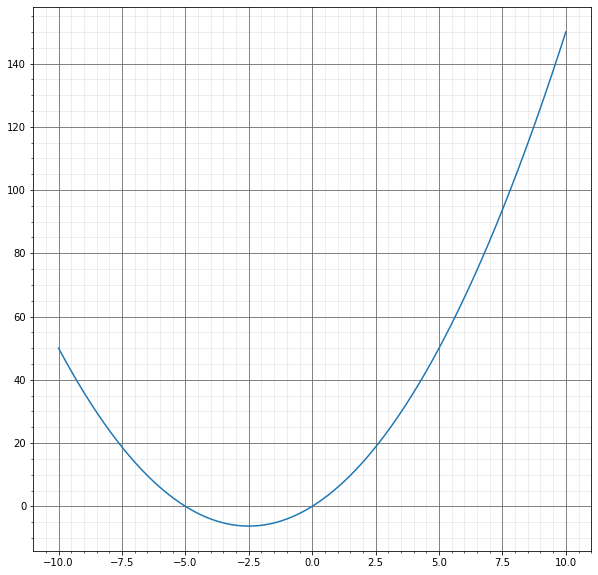

In [345]:
f4 = x**2+5*x
lst1 = newton(f3,3.5)

f_lambda4 = lambdify(x,f4)

fig3 = plt.figure(figsize=(10, 10))
x4 = np.linspace(-10, 10, 5500)
ax3 = fig.gca()

plt.plot(x4,f_lambda4(x4))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

## Newton-Raphson Method

$$
Newton's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{f'(x_k)}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{f''(x_k)}
$$

In [346]:
def newton(fct,x0,err=0.05):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  fct_second = fct.diff(x,2)
  print(fct_prime)
  print(fct_second)

  x_k = x0

  f_prime = lambdify(x,fct_prime)
  f_second = lambdify(x,fct_second)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x0) 
  f_second_xk = f_second(x0)
  if (f_second_xk != 0) and (f_second_xk > 0):
    while (f_prime_xk > err):
      x_k1 = x_k-(f_prime_xk/f_second_xk)
      x_k = x_k1
      print("x_k: ",x_k)
      f_prime_xk = f_prime(x_k)
      print("f_prime_xk : ",f_prime_xk) 
      f_second_xk = f_second(x_k)
      print("f_second_xk : ",f_second_xk)
      
      if f_prime_xk < err:
        print([x_k,f(x_k)])
        return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")



Function : x**2 + 5*x
2*x + 5
2
x_k:  -2.5
f_prime_xk :  0.0
f_second_xk :  2
[-2.5, -6.25]


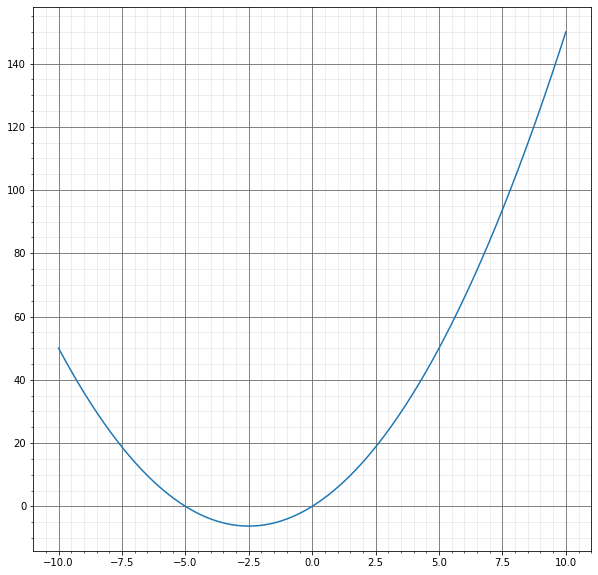

In [347]:
f3 = x**2+5*x
lst1 = newton(f3,3.5)

f_lambda3 = lambdify(x,f3)

fig2 = plt.figure(figsize=(10, 10))
x3 = np.linspace(-10, 10, 5500)
ax2 = fig.gca()

plt.plot(x3,f_lambda3(x3))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

## False Position Method - Regula Falsi